# **Stock (BMRI) - Pre-Processing & Descriptive Analysis**

## **Data Load & Understanding**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_csv('data/BMRI.csv')

In [ ]:
# Display the contents of the dataset as a whole
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,3687.5,3687.5,3687.5,3687.5,2986.018799,0
1,2019-01-01,3687.5,3687.5,3687.5,3687.5,2986.018799,0
2,2019-01-02,3700.0,3700.0,3625.0,3662.5,2965.774414,45319200
3,2019-01-03,3637.5,3675.0,3550.0,3587.5,2905.041992,74174000
4,2019-01-04,3587.5,3725.0,3575.0,3725.0,3016.385254,78514000
...,...,...,...,...,...,...,...
1228,2023-12-21,5950.0,5975.0,5925.0,5975.0,5975.000000,50363900
1229,2023-12-22,5950.0,5975.0,5925.0,5975.0,5975.000000,29975600
1230,2023-12-27,6000.0,6025.0,5925.0,6000.0,6000.000000,43114900
1231,2023-12-28,6050.0,6150.0,6000.0,6125.0,6125.000000,75118700


In [ ]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1233 non-null   object 
 1   Open       1233 non-null   float64
 2   High       1233 non-null   float64
 3   Low        1233 non-null   float64
 4   Close      1233 non-null   float64
 5   Adj Close  1233 non-null   float64
 6   Volume     1233 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.6+ KB


In [ ]:
# Check the number of columns and rows in the data
df.shape

(1233, 7)

In [ ]:
# Shows a description of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1.233000e+03
mean,3912.145174,3956.909976,3862.382401,3909.628954,3575.718243,1.009951e+08
std,991.604480,995.810533,991.490405,994.653228,1113.843221,6.222125e+07
min,1880.000000,1900.000000,1830.000000,1860.000000,1633.401123,0.000000e+00
25%,3225.000000,3262.500000,3162.500000,3212.500000,2826.588379,6.187700e+07
50%,3725.000000,3762.500000,3675.000000,3712.500000,3201.196533,8.710020e+07
75%,4625.000000,4675.000000,4587.500000,4625.000000,4400.395996,1.246610e+08
max,10350.000000,10400.000000,10225.000000,10225.000000,10225.000000,7.702524e+08


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,3687.5,3687.5,3687.5,3687.5,2986.018799,0
1,2019-01-01,3687.5,3687.5,3687.5,3687.5,2986.018799,0
2,2019-01-02,3700.0,3700.0,3625.0,3662.5,2965.774414,45319200
3,2019-01-03,3637.5,3675.0,3550.0,3587.5,2905.041992,74174000
4,2019-01-04,3587.5,3725.0,3575.0,3725.0,3016.385254,78514000
5,2019-01-07,3750.0,3787.5,3712.5,3712.5,3006.262939,53624800
6,2019-01-08,3712.5,3737.5,3675.0,3675.0,2975.896484,80073200
7,2019-01-09,3750.0,3787.5,3700.0,3787.5,3066.995605,104903400
8,2019-01-10,3812.5,3850.0,3775.0,3850.0,3117.606201,130603200
9,2019-01-11,3875.0,3900.0,3837.5,3850.0,3117.606201,88899400


In [ ]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1223,2023-12-14,5825.0,6025.0,5800.0,5950.0,5950.0,171595800
1224,2023-12-15,5950.0,6000.0,5900.0,5900.0,5900.0,142382200
1225,2023-12-18,5850.0,5950.0,5850.0,5925.0,5925.0,101458600
1226,2023-12-19,5950.0,5975.0,5925.0,5975.0,5975.0,40763200
1227,2023-12-20,5900.0,5975.0,5900.0,5925.0,5925.0,65361000
1228,2023-12-21,5950.0,5975.0,5925.0,5975.0,5975.0,50363900
1229,2023-12-22,5950.0,5975.0,5925.0,5975.0,5975.0,29975600
1230,2023-12-27,6000.0,6025.0,5925.0,6000.0,6000.0,43114900
1231,2023-12-28,6050.0,6150.0,6000.0,6125.0,6125.0,75118700
1232,2023-12-29,6125.0,6125.0,6000.0,6050.0,6050.0,63097100


In [ ]:
# Melihat nilai max pada setiap kolom yang ada
max_kolom = df.max()
print("Nilai Max dari setiap kolom:")
print(max_kolom)

# Melihat nilai min pada setiap kolom yang ada
min_kolom = df.min()
print("\nNilai Min dari setiap kolom:")
print(min_kolom)

# Melihat nilai mean pada setiap kolom yang ada
mean_kolom = round(df.mean())
print("\nNilai Mean dari setiap kolom:")
print(mean_kolom)

Nilai Max dari setiap kolom:
Date         2023-12-29
Open              10350
High              10400
Low               10225
Close             10225
Adj Close         10225
Volume        770252400
dtype: object

Nilai Min dari setiap kolom:
Date         2018-12-31
Open               1880
High               1900
Low                1830
Close              1860
Adj Close        1633.4
Volume                0
dtype: object

Nilai Mean dari setiap kolom:
Open              3912.0
High              3957.0
Low               3862.0
Close             3910.0
Adj Close         3576.0
Volume       100995125.0
dtype: float64


## **Data Cleaning**

### **Detecting Outlier**

In [ ]:
df_num = df.select_dtypes(include = ['float'])

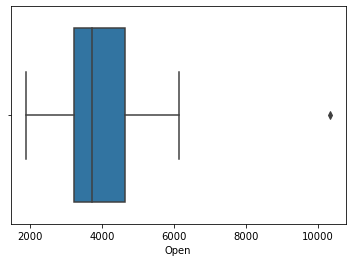

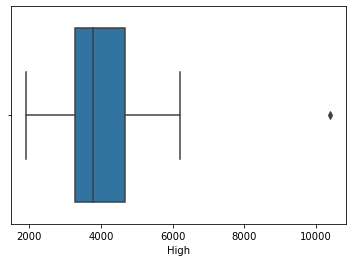

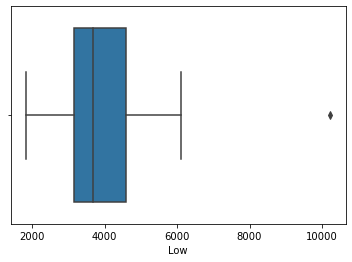

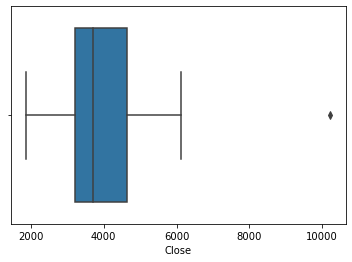

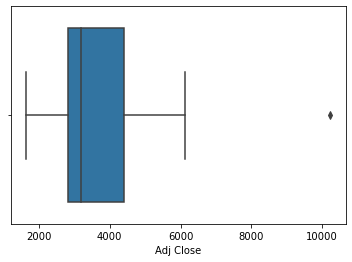

In [ ]:
# Detecting outliers using boxplot
for i in df_num:
    sns.boxplot(data= df_num, x=i)
    plt.show()

In [ ]:
# Function to identify outliers using the IQR method
def find_outliers_iqr(column):
    if df[column].dtype in ['float']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers
    else:
        return pd.DataFrame()

# Identify columns with outliers
columns_with_outliers = []
outliers_counts = {}

for column in df.columns:
    outliers = find_outliers_iqr(column)
    if not outliers.empty:
        columns_with_outliers.append(column)
        outliers_counts[column] = len(outliers)

# Strategy for handling outliers: Delete rows containing outliers
for column in columns_with_outliers:
    outliers = find_outliers_iqr(column)
    df = df.drop(outliers.index)

In [ ]:
# Display columns with outliers and number of outliers
print("Columns with outliers and the number of outliers detected:")
for column in columns_with_outliers:
    print(f"{column}: {outliers_counts[column]} outliers")

Columns with outliers and the number of outliers detected:
Open: 1 outliers
High: 1 outliers
Low: 1 outliers
Close: 1 outliers
Adj Close: 1 outliers


In [ ]:
# Display columns with outliers and number of outliers
print("Columns with outliers and the number of outliers detected:")
for column in columns_with_outliers:
    print(f"{column}: {outliers_counts[column]} outliers")

Columns with outliers and the number of outliers detected:


In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### **Data Type Transformation**


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1232 non-null   datetime64[ns]
 1   Open       1232 non-null   float64       
 2   High       1232 non-null   float64       
 3   Low        1232 non-null   float64       
 4   Close      1232 non-null   float64       
 5   Adj Close  1232 non-null   float64       
 6   Volume     1232 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 117.0 KB


## **Data Visualization**

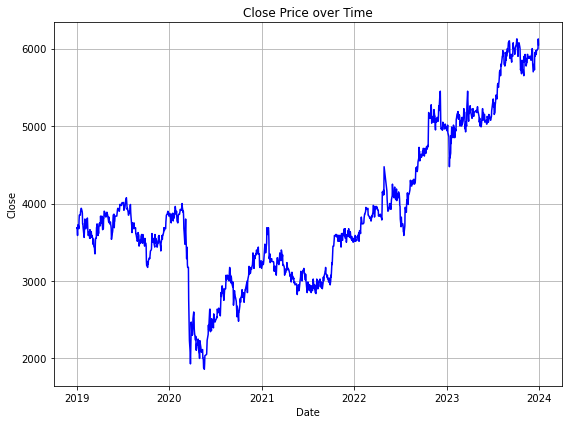

In [ ]:
#Close
plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Close'], linestyle='-', color='b')

# Label sumbu x dan y
plt.xlabel('Date')
plt.ylabel('Close')

# Judul grafik
plt.title('Close Price over Time')

# Menampilkan grafik
plt.grid(True)
plt.tight_layout()
plt.show()

## **Saving Cleaned Data to csv**

In [ ]:
df.to_csv('BMRI_Cleaned.csv', index=False)